In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import time

In [24]:

# Read the CSV file into a pandas DataFrame
train_df = pd.read_csv('../datasets/train_set.csv')

train_df = train_df.drop(columns=['Assembly Code', 'Assembly Description', 'Type Name'])

# Define preprocessing for categorical features
categorical_features = ['Family', 'SubFamily', 'ObjectGroup', 'ObjectName', 'Description', 'Type Comments', 'Structural Material', 'Material']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

# Split the data into training and testing sets
X = train_df.drop('Category', axis=1)
y = train_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# Initialize LabelEncoder
label_encoder = LabelEncoder()

y_encoder = LabelEncoder()
y_train = y_encoder.fit_transform(y_train)
y_test_encoded = y_encoder.fit_transform(y_test)

In [29]:
# Start timing
start_time = time.time()

# Define the neural network model
model_nn = Sequential(
    [
        Dense(512, activation="relu", input_shape=(X_train_processed.shape[1],)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(len(train_df["Category"].unique()), activation="softmax"),
    ]
)

# Compile and train the model
model_nn.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history = model_nn.fit(
    X_train_processed,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_processed, y_test_encoded),
)
# End timing
end_time = time.time()
# Calculate total runtime
total_time = end_time - start_time
print(f"Total runtime: {total_time} seconds")
# Evaluate the model on the testing set
loss, accuracy = model_nn.evaluate(X_test_processed, y_test_encoded)
print("Test Accuracy:", accuracy)

Epoch 1/50


c:\Users\xiang\miniconda3\envs\tf\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_12/dense_40/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_12/dense_40/embedding_lookup_sparse/Reshape:0", shape=(None, 512), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_12/dense_40/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


76/76 [==============================] - 2s 12ms/step - loss: 1.1195 - accuracy: 0.7303 - val_loss: 3.4177 - val_accuracy: 0.1733
Epoch 2/50
76/76 [==============================] - 1s 8ms/step - loss: 0.2924 - accuracy: 0.9149 - val_loss: 3.3621 - val_accuracy: 0.1964
Epoch 3/50
76/76 [==============================] - 1s 9ms/step - loss: 0.1181 - accuracy: 0.9723 - val_loss: 3.3984 - val_accuracy: 0.1914
Epoch 4/50
76/76 [==============================] - 1s 8ms/step - loss: 0.0597 - accuracy: 0.9872 - val_loss: 3.5014 - val_accuracy: 0.1931
Epoch 5/50
76/76 [==============================] - 1s 8ms/step - loss: 0.0358 - accuracy: 0.9917 - val_loss: 4.0007 - val_accuracy: 0.1931
Epoch 6/50
76/76 [==============================] - 1s 8ms/step - loss: 0.0184 - accuracy: 0.9979 - val_loss: 5.0800 - val_accuracy: 0.1931
Epoch 7/50
76/76 [==============================] - 1s 8ms/step - loss: 0.0141 - accuracy: 0.9971 - val_loss: 6.5428 - val_accuracy: 0.1931
Epoch 8/50
76/76 [============

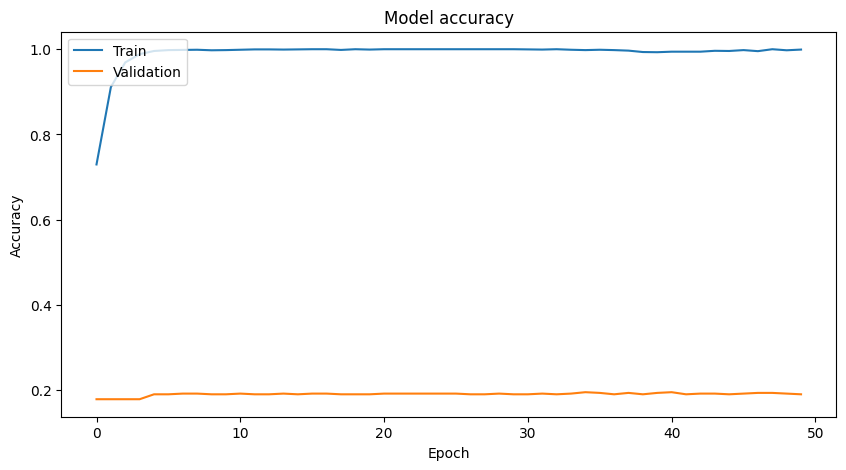

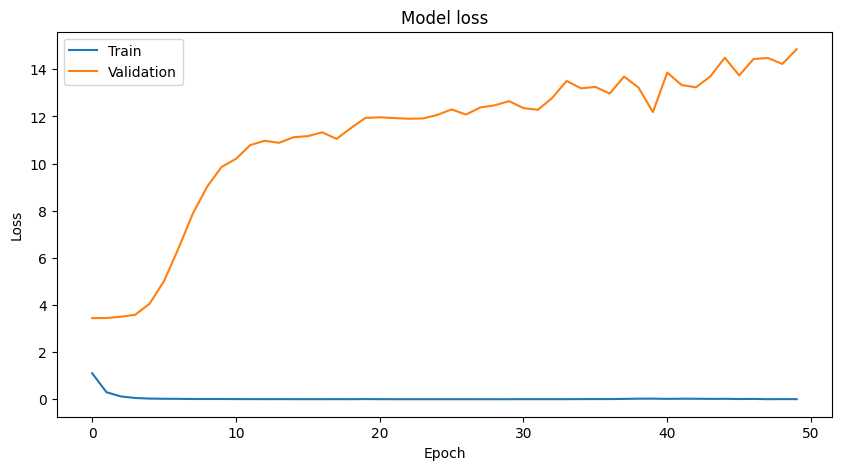

In [26]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:


# Save the model to disk
model_nn.save('FNN_model_pipline.h5')
print("Model saved to disk.")

19/19 [==============================] - 0s 4ms/step - loss: 14.8526 - accuracy: 0.1898
Test Accuracy: 0.1897689700126648
Model saved to disk.
